### Run the 2 cells below before you start 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# Load diabetes data
diabetes = datasets.load_diabetes()

# Put data into datarame
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

# Add dependent variable
df['Progression'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [2]:
# Dataset description - unique to sklearn datasets
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

1. In the cell below, display the number of non-null entries for each column and the datatype for each column.  (hint: is there an easy function that does this in a simple command?)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age            442 non-null float64
sex            442 non-null float64
bmi            442 non-null float64
bp             442 non-null float64
s1             442 non-null float64
s2             442 non-null float64
s3             442 non-null float64
s4             442 non-null float64
s5             442 non-null float64
s6             442 non-null float64
Progression    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


2. In the cell below, display the count, mean, min, and max for each column. (hint: is there an easy function that does this in a simple command?)

In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


3. In the cell below, display a correlation heatmap for our dataframe.  Are there any columns that are strongly correlated with each other?

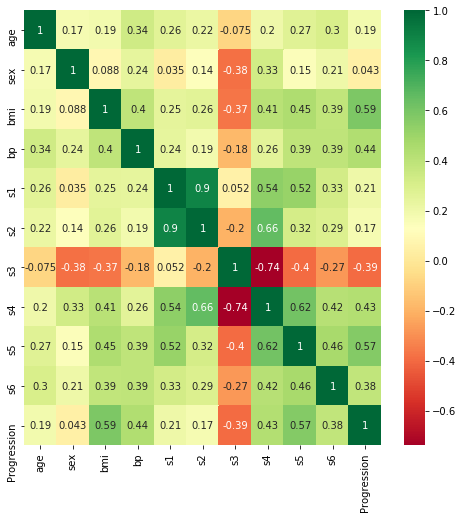

In [5]:
corr = df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

# s1 and s2 are highly correlated with each other

4. In the cell below, create a scatter plot of s1 and s2.

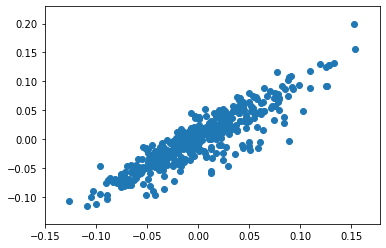

In [6]:
plt.scatter(df.s1, df.s2)

5. In the cell below, create a scatter plot of s1 and s3.  What is different about this scatter plot than the one above?  What does this imply about the correlation?

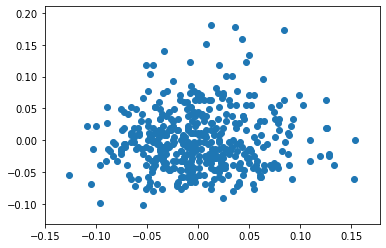

In [7]:
plt.scatter(df.s1, df.s3)

# In this plot, the values are less tightly packed together and do not seem to follow as much of a 
# linear trend as the chart above.  This implies that s1 and s3 are less correlated as s1 and s2.

6. In the cell below, create a "y" variable that uses "Progression" and an x-variable which has the other variables.

In [8]:
y = df['Progression']
x = df.copy().drop('Progression', axis = 1)

7. In the cell below, create a split of 80% testing, 20% training data and print out the shapes of the resulting 4 variables that store those values.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=99)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


8. In the cell below, run a linear regression model on both the training and testing data.  Which variables are significant?  Does the model overfit training data?

In [10]:
print('\nLinear Regression Results')

x_train2 = sm.add_constant(x_train, prepend=False)
est = sm.OLS(y_train, x_train2)
regr = est.fit()
print(regr.summary())

x_test2 = sm.add_constant(x_test, prepend=False)
y_pred = regr.predict(x_test2)
test_acc=r2_score(y_test, y_pred)
print('\nTest accuracy =',test_acc)

# The model has significant variables in sex, bmi, bp, s5 and the regression constant.
# The model doesn't have a large issue of overfitting as training accuracy of .533 is not too far off
# from testing accuracy of .433.


Linear Regression Results
                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     39.09
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           7.76e-51
Time:                        11:54:55   Log-Likelihood:                -1900.4
No. Observations:                 353   AIC:                             3823.
Df Residuals:                     342   BIC:                             3865.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           47.6654    

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


9. In the cell below, create a scatter plot with the actual y-values for the test set along with the predicted values your model gives you.  Additionally, print out the correlation between the predicted and actual values.

correlation: 0.6912477563402437


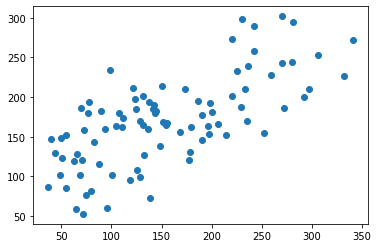

In [11]:
print("correlation:",y_test.corr(y_pred))

plt.scatter(y_test, y_pred)